In [23]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Chia train test theo tỉ lệ 8:2**

In [24]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 8:2
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [25]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [27]:
# 5. Đánh giá độ chính xác test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 11356.1173507071
Testing RMSE: 13107.537687842812
Testing MAPE: 0.2651599493213657


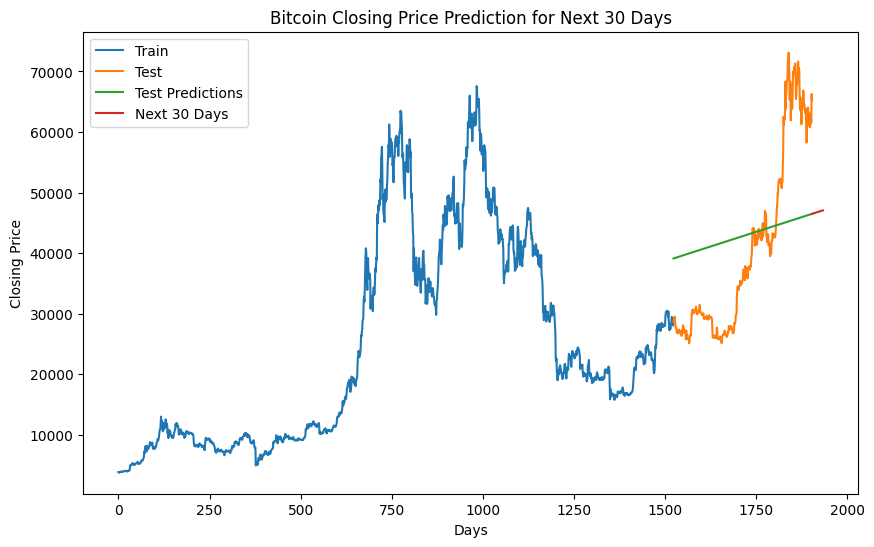

Predicted closing prices for the next 30 days:
[46507.61373038 46526.98570225 46546.35767412 46565.72964599
 46585.10161786 46604.47358973 46623.84556159 46643.21753346
 46662.58950533 46681.9614772  46701.33344907 46720.70542094
 46740.07739281 46759.44936468 46778.82133654 46798.19330841
 46817.56528028 46836.93725215 46856.30922402 46875.68119589
 46895.05316776 46914.42513963 46933.79711149 46953.16908336
 46972.54105523 46991.9130271  47011.28499897 47030.65697084
 47050.02894271 47069.40091458]


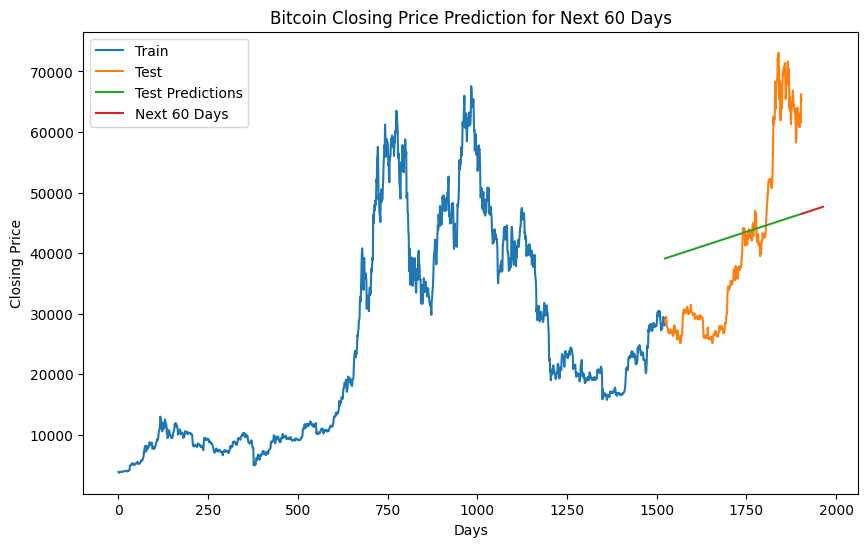

Predicted closing prices for the next 60 days:
[46507.61373038 46526.98570225 46546.35767412 46565.72964599
 46585.10161786 46604.47358973 46623.84556159 46643.21753346
 46662.58950533 46681.9614772  46701.33344907 46720.70542094
 46740.07739281 46759.44936468 46778.82133654 46798.19330841
 46817.56528028 46836.93725215 46856.30922402 46875.68119589
 46895.05316776 46914.42513963 46933.79711149 46953.16908336
 46972.54105523 46991.9130271  47011.28499897 47030.65697084
 47050.02894271 47069.40091458 47088.77288644 47108.14485831
 47127.51683018 47146.88880205 47166.26077392 47185.63274579
 47205.00471766 47224.37668953 47243.74866139 47263.12063326
 47282.49260513 47301.864577   47321.23654887 47340.60852074
 47359.98049261 47379.35246448 47398.72443634 47418.09640821
 47437.46838008 47456.84035195 47476.21232382 47495.58429569
 47514.95626756 47534.32823943 47553.70021129 47573.07218316
 47592.44415503 47611.8161269  47631.18809877 47650.56007064]


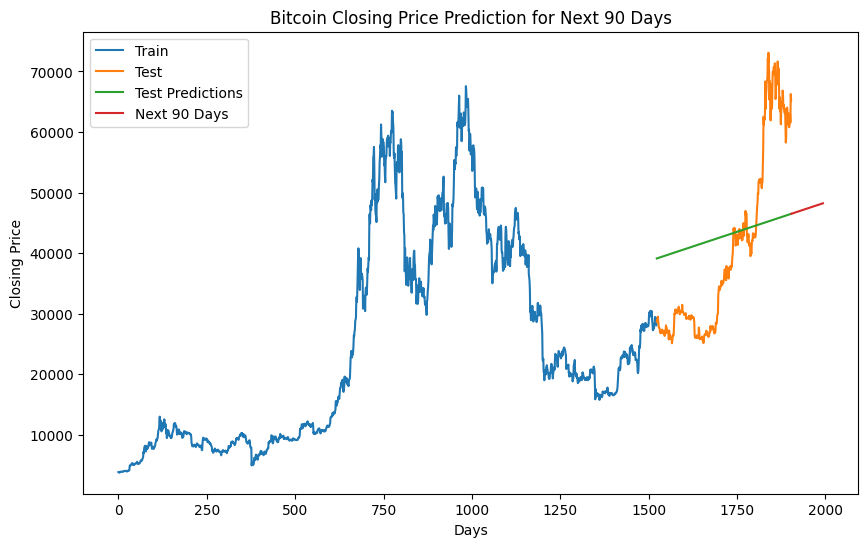

Predicted closing prices for the next 90 days:
[46507.61373038 46526.98570225 46546.35767412 46565.72964599
 46585.10161786 46604.47358973 46623.84556159 46643.21753346
 46662.58950533 46681.9614772  46701.33344907 46720.70542094
 46740.07739281 46759.44936468 46778.82133654 46798.19330841
 46817.56528028 46836.93725215 46856.30922402 46875.68119589
 46895.05316776 46914.42513963 46933.79711149 46953.16908336
 46972.54105523 46991.9130271  47011.28499897 47030.65697084
 47050.02894271 47069.40091458 47088.77288644 47108.14485831
 47127.51683018 47146.88880205 47166.26077392 47185.63274579
 47205.00471766 47224.37668953 47243.74866139 47263.12063326
 47282.49260513 47301.864577   47321.23654887 47340.60852074
 47359.98049261 47379.35246448 47398.72443634 47418.09640821
 47437.46838008 47456.84035195 47476.21232382 47495.58429569
 47514.95626756 47534.32823943 47553.70021129 47573.07218316
 47592.44415503 47611.8161269  47631.18809877 47650.56007064
 47669.93204251 47689.30401438 47708.6

In [28]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

# **Chia train test theo tỉ lệ 7:3**

In [29]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 7:3
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [30]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [32]:
# 5. Đánh giá độ chính xác test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 20774.83386378525
Testing RMSE: 22331.04073700198
Testing MAPE: 0.40081489228257383


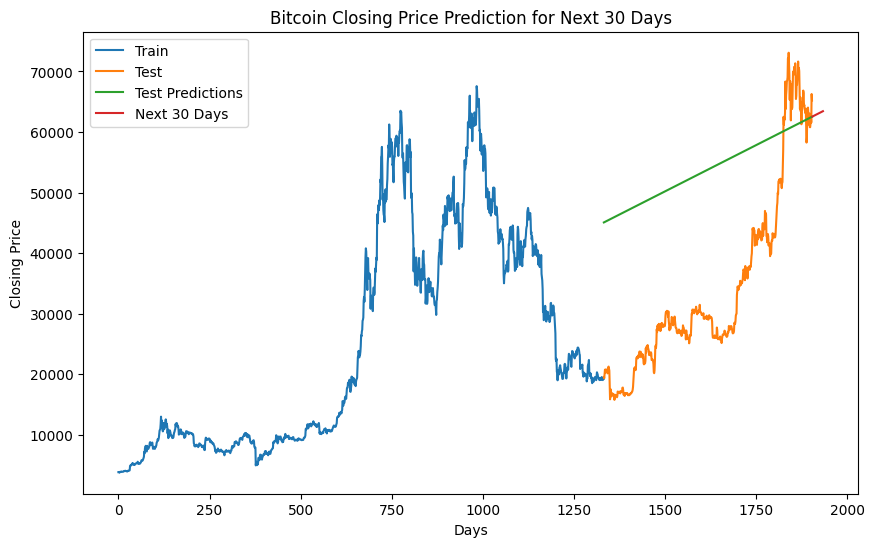

Predicted closing prices for the next 30 days:
[62545.84934697 62576.39541915 62606.94149134 62637.48756352
 62668.0336357  62698.57970788 62729.12578007 62759.67185225
 62790.21792443 62820.76399662 62851.3100688  62881.85614098
 62912.40221317 62942.94828535 62973.49435753 63004.04042972
 63034.5865019  63065.13257408 63095.67864627 63126.22471845
 63156.77079063 63187.31686282 63217.862935   63248.40900718
 63278.95507936 63309.50115155 63340.04722373 63370.59329591
 63401.1393681  63431.68544028]


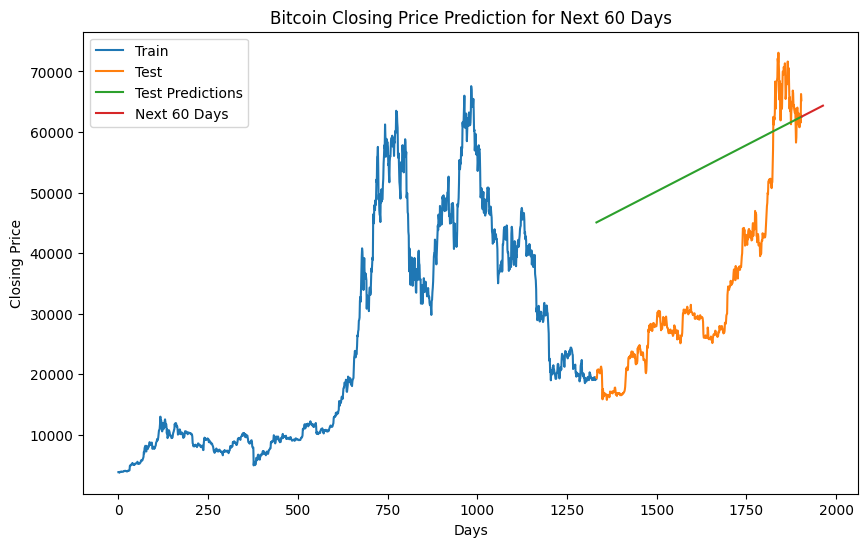

Predicted closing prices for the next 60 days:
[62545.84934697 62576.39541915 62606.94149134 62637.48756352
 62668.0336357  62698.57970788 62729.12578007 62759.67185225
 62790.21792443 62820.76399662 62851.3100688  62881.85614098
 62912.40221317 62942.94828535 62973.49435753 63004.04042972
 63034.5865019  63065.13257408 63095.67864627 63126.22471845
 63156.77079063 63187.31686282 63217.862935   63248.40900718
 63278.95507936 63309.50115155 63340.04722373 63370.59329591
 63401.1393681  63431.68544028 63462.23151246 63492.77758465
 63523.32365683 63553.86972901 63584.4158012  63614.96187338
 63645.50794556 63676.05401775 63706.60008993 63737.14616211
 63767.6922343  63798.23830648 63828.78437866 63859.33045084
 63889.87652303 63920.42259521 63950.96866739 63981.51473958
 64012.06081176 64042.60688394 64073.15295613 64103.69902831
 64134.24510049 64164.79117268 64195.33724486 64225.88331704
 64256.42938923 64286.97546141 64317.52153359 64348.06760578]


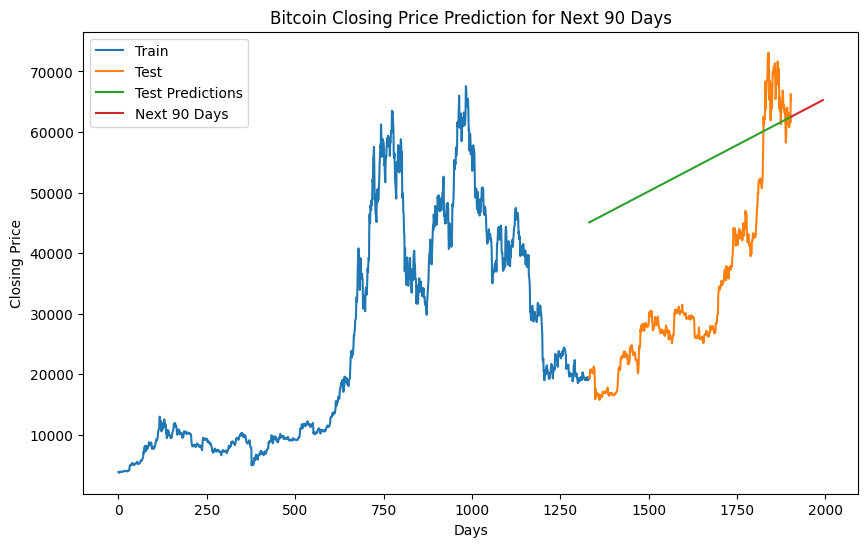

Predicted closing prices for the next 90 days:
[62545.84934697 62576.39541915 62606.94149134 62637.48756352
 62668.0336357  62698.57970788 62729.12578007 62759.67185225
 62790.21792443 62820.76399662 62851.3100688  62881.85614098
 62912.40221317 62942.94828535 62973.49435753 63004.04042972
 63034.5865019  63065.13257408 63095.67864627 63126.22471845
 63156.77079063 63187.31686282 63217.862935   63248.40900718
 63278.95507936 63309.50115155 63340.04722373 63370.59329591
 63401.1393681  63431.68544028 63462.23151246 63492.77758465
 63523.32365683 63553.86972901 63584.4158012  63614.96187338
 63645.50794556 63676.05401775 63706.60008993 63737.14616211
 63767.6922343  63798.23830648 63828.78437866 63859.33045084
 63889.87652303 63920.42259521 63950.96866739 63981.51473958
 64012.06081176 64042.60688394 64073.15295613 64103.69902831
 64134.24510049 64164.79117268 64195.33724486 64225.88331704
 64256.42938923 64286.97546141 64317.52153359 64348.06760578
 64378.61367796 64409.15975014 64439.7

In [33]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

# **Chia train test theo tỉ lệ 6:4**

In [34]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 6:4
df = pd.read_csv('BTC.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [35]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [37]:
# 5. Đánh giá độ chính xác test
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 39392.43614635616
Testing RMSE: 40545.77955604678
Testing MAPE: 0.5622139845223947


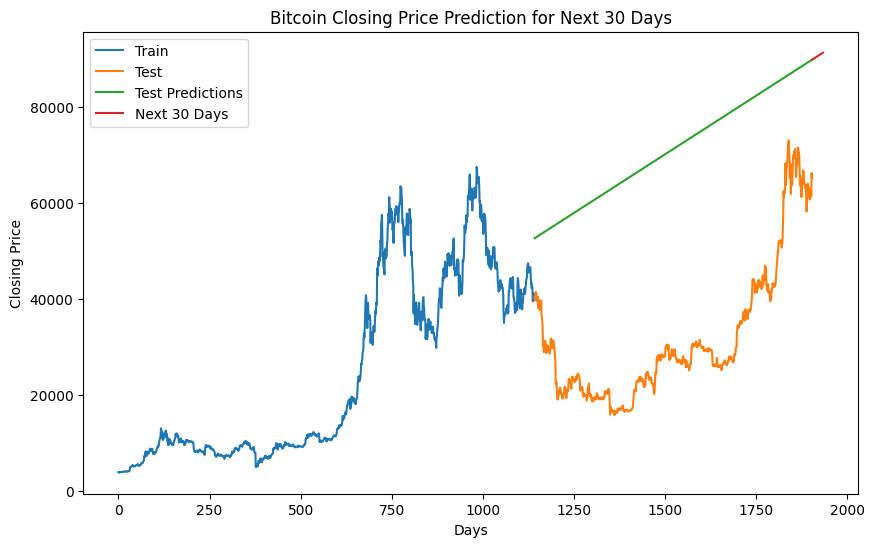

Predicted closing prices for the next 30 days:
[89964.59983704 90013.52955384 90062.45927065 90111.38898745
 90160.31870426 90209.24842106 90258.17813787 90307.10785467
 90356.03757148 90404.96728828 90453.89700509 90502.82672189
 90551.7564387  90600.6861555  90649.61587231 90698.54558911
 90747.47530592 90796.40502272 90845.33473953 90894.26445633
 90943.19417314 90992.12388994 91041.05360675 91089.98332355
 91138.91304036 91187.84275716 91236.77247397 91285.70219077
 91334.63190758 91383.56162438]


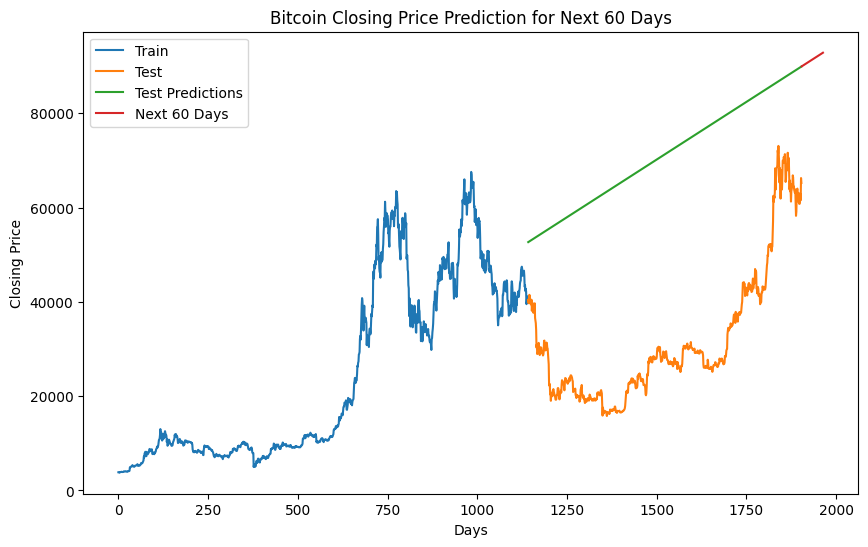

Predicted closing prices for the next 60 days:
[89964.59983704 90013.52955384 90062.45927065 90111.38898745
 90160.31870426 90209.24842106 90258.17813787 90307.10785467
 90356.03757148 90404.96728828 90453.89700509 90502.82672189
 90551.7564387  90600.6861555  90649.61587231 90698.54558911
 90747.47530592 90796.40502272 90845.33473953 90894.26445633
 90943.19417314 90992.12388994 91041.05360675 91089.98332355
 91138.91304036 91187.84275716 91236.77247397 91285.70219077
 91334.63190758 91383.56162438 91432.49134119 91481.42105799
 91530.3507748  91579.2804916  91628.21020841 91677.13992521
 91726.06964202 91774.99935882 91823.92907563 91872.85879243
 91921.78850924 91970.71822604 92019.64794285 92068.57765965
 92117.50737646 92166.43709326 92215.36681007 92264.29652687
 92313.22624368 92362.15596048 92411.08567729 92460.01539409
 92508.9451109  92557.8748277  92606.80454451 92655.73426131
 92704.66397812 92753.59369492 92802.52341173 92851.45312853]


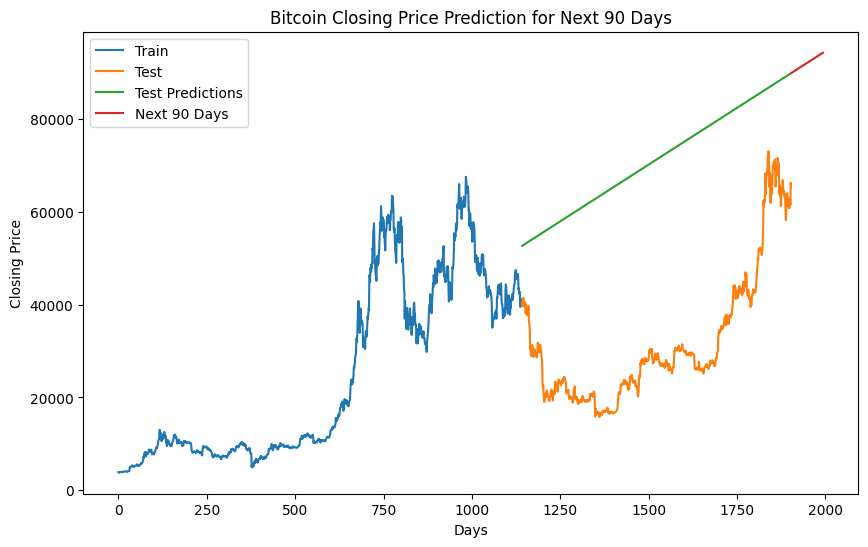

Predicted closing prices for the next 90 days:
[89964.59983704 90013.52955384 90062.45927065 90111.38898745
 90160.31870426 90209.24842106 90258.17813787 90307.10785467
 90356.03757148 90404.96728828 90453.89700509 90502.82672189
 90551.7564387  90600.6861555  90649.61587231 90698.54558911
 90747.47530592 90796.40502272 90845.33473953 90894.26445633
 90943.19417314 90992.12388994 91041.05360675 91089.98332355
 91138.91304036 91187.84275716 91236.77247397 91285.70219077
 91334.63190758 91383.56162438 91432.49134119 91481.42105799
 91530.3507748  91579.2804916  91628.21020841 91677.13992521
 91726.06964202 91774.99935882 91823.92907563 91872.85879243
 91921.78850924 91970.71822604 92019.64794285 92068.57765965
 92117.50737646 92166.43709326 92215.36681007 92264.29652687
 92313.22624368 92362.15596048 92411.08567729 92460.01539409
 92508.9451109  92557.8748277  92606.80454451 92655.73426131
 92704.66397812 92753.59369492 92802.52341173 92851.45312853
 92900.38284534 92949.31256214 92998.2

In [38]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)